# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).


**Необходимо классифицировать отзывы, анализируя текст, положительный он или отрицательный**

**Data descr:**

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data


In [2]:
yelp=pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Создадим столбец с длинной каждого отзыва для дальнейшего исследования данных.**

In [15]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [16]:
#def splt(mess):
 #   return mess.split()
#yelp['text length']=yelp['text'].apply(splt).apply(len)
#yelp.head()

# Exploration.

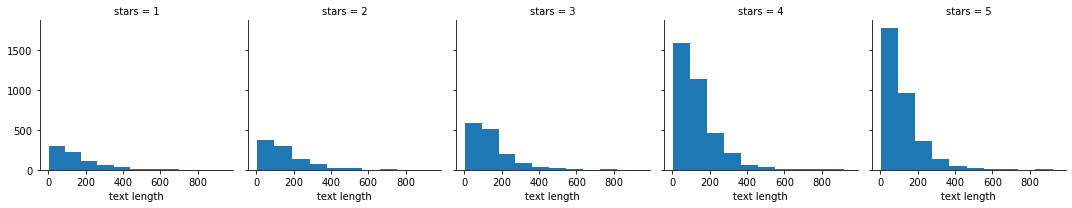

In [7]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

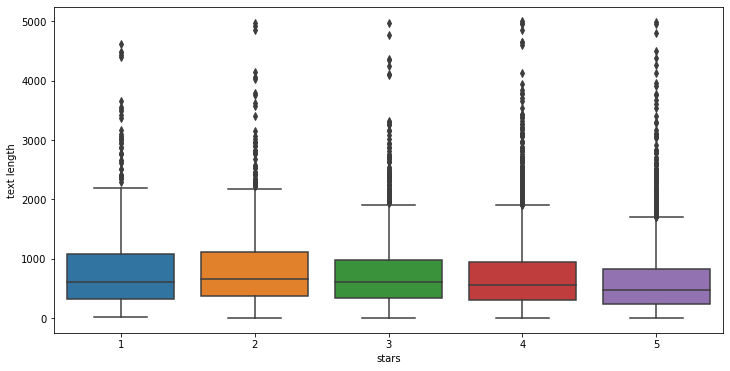

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='stars',y='text length',data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

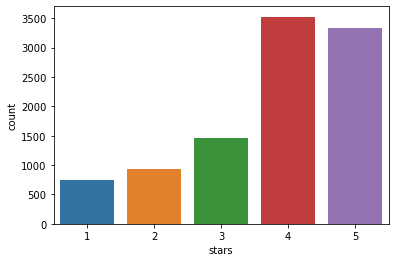

In [9]:
sns.countplot(x='stars',data=yelp)

In [10]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


In [12]:
stars_corr = stars.corr()
stars_corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


<AxesSubplot:>

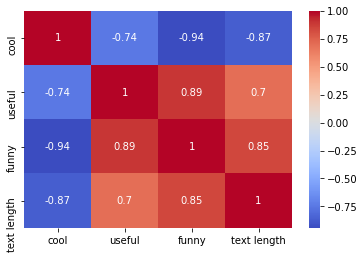

In [17]:
sns.heatmap(stars_corr,cmap='coolwarm',annot=True)

## NLP Classification Task

Создадим таблицу только из отзывов на 5 звёзд и 1 звезду 

In [36]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [37]:
X=yelp_class['text']
y=yelp_class['stars']

**Создадим разрежённую матрицу, "мешок слов".**

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [39]:
X=cv.fit_transform(X)
print(cv.get_feature_names())


['00', '000', '00a', '00am', '00pm', '01', '02', '03', '03342', '04', '05', '06', '07', '09', '0buxoc0crqjpvkezo3bqog', '0l', '10', '100', '1000', '1000x', '1001', '100s', '100th', '101', '102', '1030', '105', '1070', '108', '109', '10am', '10ish', '10min', '10mins', '10minutes', '10pm', '10th', '10x', '10yo', '11', '110', '1100', '111', '111th', '112', '115', '115th', '116', '118', '11a', '11am', '11p', '11pm', '12', '120', '128i', '129', '12am', '12oz', '12pm', '12th', '13', '1300', '13331', '13th', '14', '140', '147', '14lbs', '15', '150', '1500', '150mm', '157', '15am', '15mins', '15pm', '15th', '16', '160', '165', '169', '16th', '17', '175', '17p', '17th', '18', '180', '1800', '1895', '18th', '19', '1900', '1913', '1928', '1929', '1930s', '1940', '1952', '1955', '1956', '1960', '1961', '1968', '1969', '1970', '1978', '1980', '1980s', '1987', '1990', '1990s', '1992', '1995', '1996', '1997', '1998', '1999', '19th', '1cent', '1k', '1p', '1pm', '1st', '20', '200', '2002', '2003', '200

In [40]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurences: ', X.nnz)

Shape of Sparse Matrix:  (4086, 19183)
Amount of Non-Zero occurences:  317288


In [41]:
sparsity = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## Train Test Split



In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Training a Model



In [43]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [44]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations



In [45]:
prediction=nb.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Теперь можем использовать TF-IDF и посмотреть что изменится**

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
from sklearn.pipeline import Pipeline

**Создадим свой анализатор**

In [50]:
from nltk.corpus import stopwords
import string
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
def text_process(mess):
    #убираем знаки пунктуции
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #убираем самые неинформативные слова
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [52]:
pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
     ('classifier',MultinomialNB()),
])

### Train Test Split



In [53]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [54]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FF2A3361F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [55]:
pred=pipeline.predict(X_test)

In [56]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результаты очевидно стали хуже, но стоит попробовать  использовать другие параметры в pipeline. Возможно результат улучшится, но скорее всего для этого набора данных TF-IDF не подходит

# Great Job!